Preparación de Librerías y datos

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt

¿Por qué?

Estas son las herramientas que vamos a usar: manejar tablas (pandas), dividir datos, crear el modelo, medir su calidad y graficar.

In [3]:
# Creamos el dataset exactamente como lo dieron
df = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Antigüedad": [5, 3, 7, 2],      # años
    "Kilometraje": [50000, 30000, 70000, 25000],  # km
    "Puertas": [4, 2, 4, 2],
    "Precio": [12000, 15000, 9000, 16000]        # USD
})

df

,ID,Antigüedad,Kilometraje,Puertas,Precio
0,1,5,50000,4,12000
1,2,3,30000,2,15000
2,3,7,70000,4,9000
3,4,2,25000,2,16000


Antes de modelar, siempre revisa si hay valores vacíos, tipos de datos raros o números fuera de lugar.

Aquí no hay nulos, pero el dataset es minúsculo (4 filas) → esto es un problema para evaluar el modelo

In [4]:
print(df.info())
print("\nValores faltantes por columna:\n", df.isna().sum())
print("\nResumen numérico:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           4 non-null      int64
 1   Antigüedad   4 non-null      int64
 2   Kilometraje  4 non-null      int64
 3   Puertas      4 non-null      int64
 4   Precio       4 non-null      int64
dtypes: int64(5)
memory usage: 288.0 bytes
None

Valores faltantes por columna:
 ID             0
Antigüedad     0
Kilometraje    0
Puertas        0
Precio         0
dtype: int64

Resumen numérico:
              ID  Antigüedad   Kilometraje   Puertas       Precio
count  4.000000    4.000000      4.000000  4.000000      4.00000
mean   2.500000    4.250000  43750.000000  3.000000  13000.00000
std    1.290994    2.217356  20564.937799  1.154701   3162.27766
min    1.000000    2.000000  25000.000000  2.000000   9000.00000
25%    1.750000    2.750000  28750.000000  2.000000  11250.00000
50%    2.500000    4.000000  40

Definir X (entradas) e y (salida)

In [5]:
X = df[["Antigüedad", "Kilometraje", "Puertas"]]  # lo que usará el modelo para predecir
y = df["Precio"]                                  # lo que queremos predecir

Le decimos al modelo: “usa estas columnas (X) para adivinar esta otra (y)

Separar entrenamiento y prueba (80%–20%)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

len(X_train), len(X_test)

(3, 1)

Entrenamos con una parte (para que “aprenda”) y probamos con otra que no vio (para ver si “generaliza”).

Problema aquí: con 4 filas, el 20% es 1 sola fila en prueba → algunas métricas no se podrán calcular bien (por ejemplo, R² no está definido con 1 dato).

Crear y entrenar el modelo de Regresión Lineal

In [7]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


La regresión lineal aprende una recta/planos que relaciona Precio con Antigüedad, Kilometraje y Puertas.

In [ ]:
Predecir en el conjunto de prueba

In [8]:
y_pred = modelo.predict(X_test)
list(y_test), list(y_pred)

([15000], [np.float64(15235.294110726649)])

Comparamos lo que el modelo predijo vs. el precio real en los datos que no vio. Eso nos dice qué tan “fuerte” es

Calcular métricas (MAE, MSE, RMSE, R²)

In [12]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignorar los warnings de R² mal definido
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [13]:
mae = mean_absolute_error(y_test, y_pred)            # error medio en USD
mse = mean_squared_error(y_test, y_pred)             # error cuadrático medio
rmse = np.sqrt(mse)                                  # raíz del MSE (vuelve a USD)

# R² con 1 muestra no está bien definido → puede dar NaN
try:
    r2 = r2_score(y_test, y_pred)
except Exception:
    r2 = np.nan

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 235.2941107266488
MSE: 55363.31854264446
RMSE: 235.2941107266488
R2: nan


Cuando use train_test_split con un dataset tan pequeño (4 en total), el 20% de test corresponde a 1 solo dato.

Las métricas como MAE, MSE, RMSE se pueden calcular con un solo valor.

Pero R² (coeficiente de determinación). Con un solo dato no existe variabilidad → por eso scikit-learn muestra:

UndefinedMetricWarning: R^2 score is not well-defined with less than two samples


👉 Esto no es un error del código, sino una limitación estadística del indicador. (Por ello, se uso la excepcion : warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
Con eso ya no verás el warning en pantalla)

Gráficos

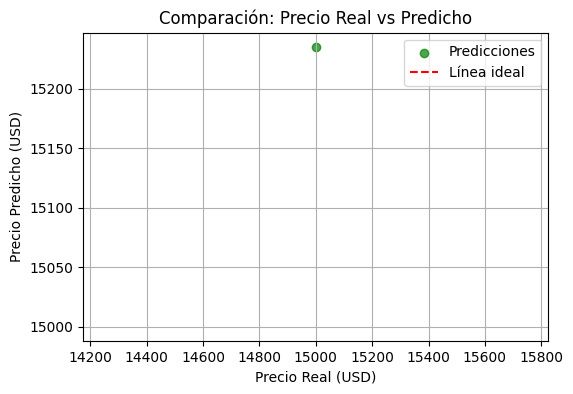

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color="green", alpha=0.7, label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Línea ideal")
plt.xlabel("Precio Real (USD)")
plt.ylabel("Precio Predicho (USD)")
plt.title("Comparación: Precio Real vs Predicho")
plt.legend()
plt.grid(True)
plt.show()

Conclusión: Los puntos verdes ➝ las predicciones.

La línea roja discontinua ➝ la predicción perfecta (donde real = predicho).

Cuanto más cerca estén los puntos de la línea roja, mejor funciona el modelo.